In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("SMSSpamCollection.tsv",sep="\t",names=['label','text'])

In [94]:
df.shape

(5568, 2)

In [8]:
for i in range(10):
    print(df.iloc[i,-1])
    print()

I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

Nah I don't think he goes to usf, he lives around here though

Even my brother is not like to speak with me. They treat me like aids patent.

I HAVE A DATE ON SUNDAY WITH WILL!!

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08

In [9]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download()
from nltk.stem.snowball import SnowballStemmer as s

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [10]:
sn=s("english")
stop=set(stopwords.words('english'))

In [11]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [12]:
def clean_text(sms):
    sms=sms.lower()
    sms=re.sub("[^a-z0-9]",' ',sms)
    sms=nltk.word_tokenize(sms)
    sms= [t for t in sms if len(t)>1]
    sms=[sn.stem(word) for word in sms if word not in stop]
    sms=' '.join(sms)
    return sms


In [18]:
clean_text("Get is....are...they UNLIMITED data 100Gb....")

'get unlimit data 100gb'

In [21]:
df['clean_text']=df['text'].apply(clean_text)

In [22]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [23]:
from wordcloud import WordCloud

In [24]:
hamdata=df[df['label']=='ham']
hamdata=hamdata['clean_text']

In [39]:
hamdata

0       search right word thank breather promis wont t...
2                    nah think goe usf live around though
3           even brother like speak treat like aid patent
4                                             date sunday
5       per request mell mell oru minnaminungint nurun...
                              ...                        
5561                                              huh lei
5564                                  go esplanad fr home
5565                                    piti mood suggest
5566    guy bitch act like interest buy someth els nex...
5567                                       rofl true name
Name: clean_text, Length: 4822, dtype: object

In [45]:
def wordCloud(data):
    words= ' '.join(data)
    wc=WordCloud(background_color='white')
    wc= wc.generate(words)
    plt.figure(figsize=(10,8))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

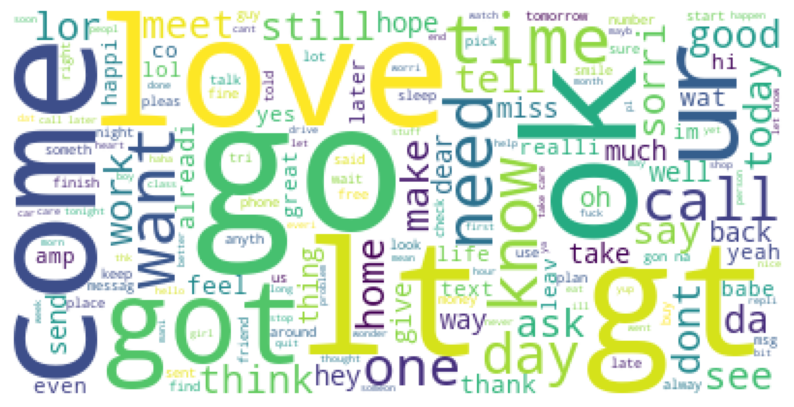

In [46]:
print("ham data words  :")
wordCloud(hamdata)


In [47]:
spamdata=df[df['label']=='spam']
spamdata=spamdata['clean_text']

spam data words  :


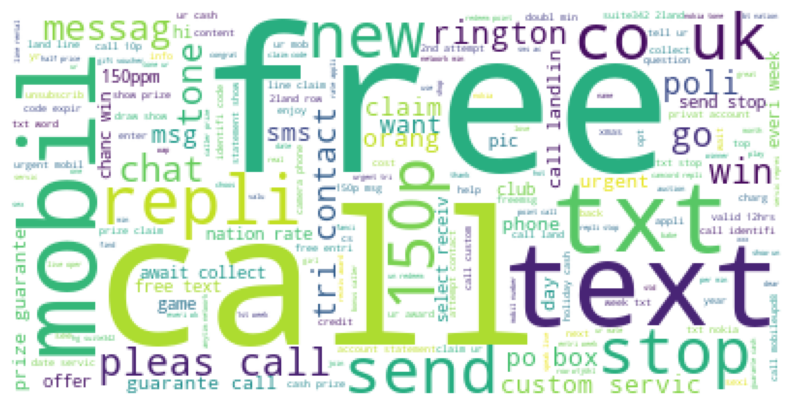

In [51]:
print("spam data words  :")
wordCloud(spamdata)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
cv=CountVectorizer(max_features=5000)

In [55]:
X=cv.fit_transform(df['clean_text']).toarray()

In [56]:
Y=pd.get_dummies(df['label'])
Y=Y['spam'].values

In [57]:
Y

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
model=MultinomialNB()

In [84]:
model.fit(x_train,y_train)

MultinomialNB()

In [85]:
y_pred=model.predict(x_test)

In [87]:
y_test,y_pred

(array([1, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([1, 1, 0, ..., 0, 0, 0], dtype=uint8))

In [88]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
0,1,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
1109,0,0
1110,0,0
1111,0,0
1112,0,0


In [89]:
print(model.score(x_train,y_train))

0.9910193084867535


In [90]:
print(model.score(x_test,y_test))

0.9865350089766607
